# Importaciones

In [7]:
from trading_environment import *
from strategies import *

# Strategies

2025-06-23 16:32:34,514 - WARNING - Skipping strategy 'MovingAverageCrossStrategy({'long_window': 50, 'short_window': 50})': short_window debe ser menor que long_window
2025-06-23 16:32:34,523 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,549 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,573 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,655 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,680 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,701 - INFO - Cargados 732 registros de caché (1 archivos)


DCA strategies: ['DCA 500@W', 'DCA 500@M', 'DCA 500@D', 'DCA 1000@W', 'DCA 1000@M', 'DCA 1000@D', 'DCA 2000@W', 'DCA 2000@M', 'DCA 2000@D']
MA  strategies: ['MA 5/50', 'MA 20/50', 'MA 5/100', 'MA 20/100', 'MA 50/100', 'MA 5/200', 'MA 20/200', 'MA 50/200']


2025-06-23 16:32:34,761 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,784 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,807 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,850 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,865 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,884 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,899 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,916 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,931 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,946 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,962 - INFO - Cargados 732 registros de caché (1 archivos)
2025-06-23 16:32:34,971 - INFO - Estrategia 'DCA 500@W' guardada en strategies\DCA_500@W.pkl
2025-06-23 16:32:34,974 - INFO - Estrategia 'DCA 

Combined Performance Report:
            Total Return  Ann. Return  Ann. Vol  Sharpe  Max Drawdown  Win Rate  Profit Factor  Expectancy
DCA 500@W         2.5032       0.5397    0.3983  1.2817       -0.2814    0.5082         1.2664      0.0020
DCA 500@M         1.7126       0.4099    0.3615  1.1300       -0.2814    0.5041         1.2413      0.0015
DCA 500@D         2.3404       0.5147    0.4016  1.2335       -0.2814    0.5082         1.2517      0.0019
DCA 1000@W        2.3603       0.5178    0.4003  1.2413       -0.2814    0.5082         1.2551      0.0019
DCA 1000@M        2.4892       0.5376    0.3901  1.2969       -0.2814    0.5041         1.2735      0.0019
DCA 1000@D        2.3354       0.5139    0.4018  1.2318       -0.2814    0.5082         1.2509      0.0019
DCA 2000@W        2.3421       0.5150    0.4014  1.2344       -0.2814    0.5082         1.2522      0.0019
DCA 2000@M        2.5152       0.5415    0.3974  1.2866       -0.2814    0.5041         1.2670      0.0019
DCA 2000

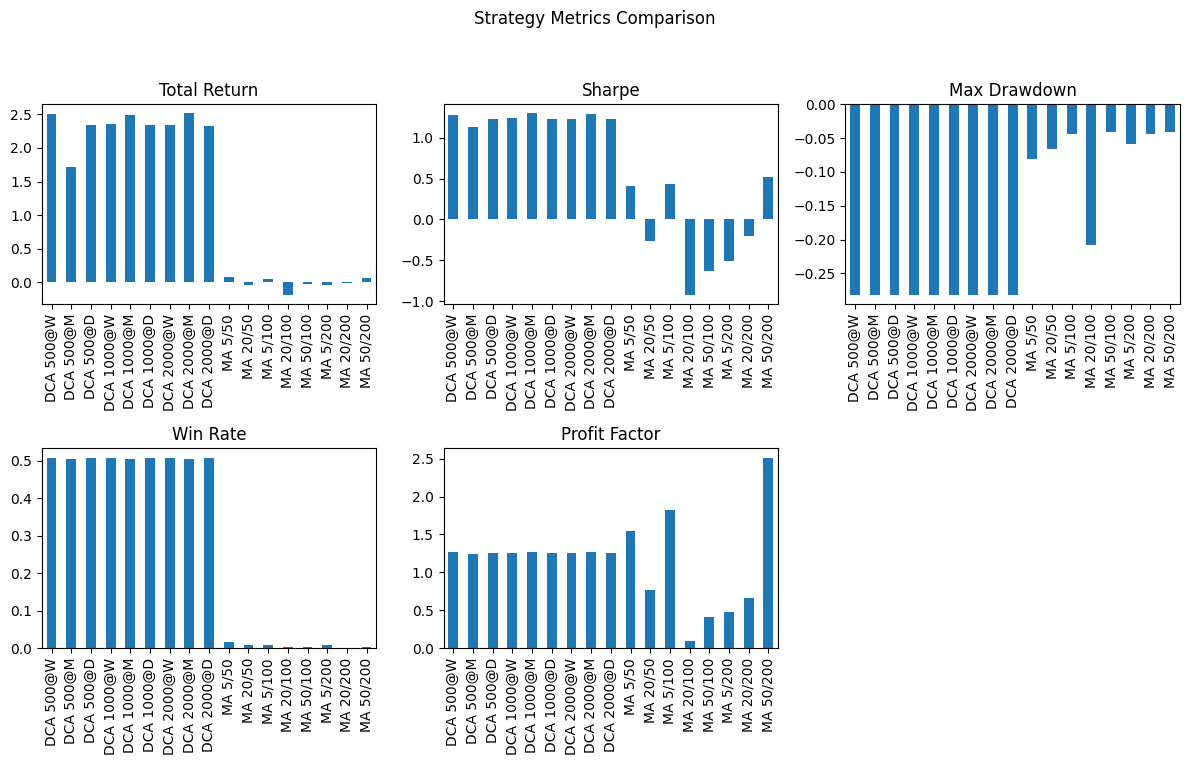

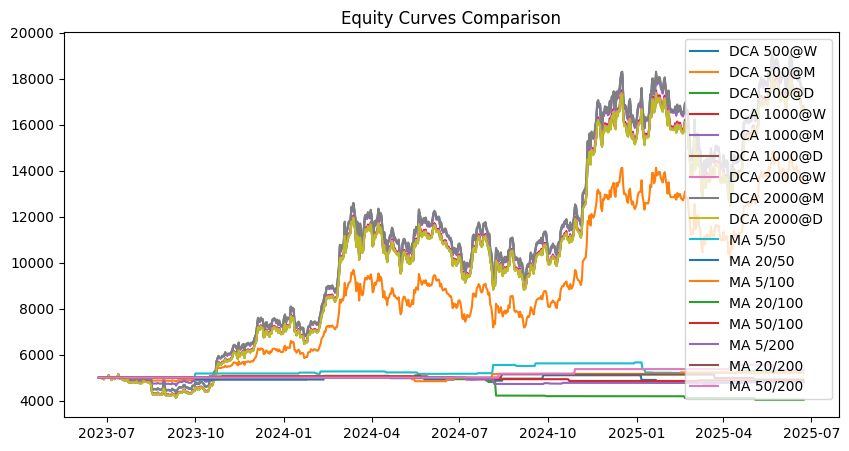

In [ ]:
# 1) Definimos dos grids de parámetros:
dca_grid = {
    'amount': [500, 1000, 2000],
    'freq': ['W', 'M', 'D']
}

ma_grid = {
    'long_window': [50, 100, 200],
    'short_window': [5, 20, 50]
}

# 2) Creamos dos colecciones, una para cada tipo de estrategia
dca_collection = StrategyCollection(DcaStrategy, dca_grid)
ma_collection  = StrategyCollection(MovingAverageCrossStrategy, ma_grid)

print(f"DCA strategies: {dca_collection.names()}")
print(f"MA  strategies: {ma_collection.names()}")

# 3) Ejecutamos backtests de todas las estrategias
symbol = 'BTC-USD'
common_kwargs = {
    'period': '2y',
    'interval': '1d',
    'initial_capital': 5000.0,
    'transaction_cost': 0.001,
    # por ejemplo, para MA podrías pasar un RiskManager, para DCA lo omitimos
}

# Backtest DCA (sin stop loss ni RiskManager)
equity_dca = dca_collection.backtest_all(
    symbol=symbol,
    **common_kwargs
)

# Backtest MA (con percent risk manager y stop-loss a 20000)
rm = RiskManager(method='pct', risk_pct=0.02)
equity_ma = ma_collection.backtest_all(
    symbol=symbol,
    **common_kwargs,
    risk_manager=rm,
    stop_loss=20000
)

# 4) Guardamos todas las estrategias en disco
strat_mgr = StrategyManager(directory=STRAT_DIR)
dca_collection.save_all(strat_mgr)
ma_collection.save_all(strat_mgr)

# 5) Combinamos todas las curvas y las comparamos


# Recolectamos analyzers
analyzers = {}
for name, eq in equity_dca.items():
    # las series `returns` las recupera del propio objeto guardado
    strat = dca_collection.strategies[name]
    analyzers[name] = PerformanceAnalyzer(eq, strat.returns)

for name, eq in equity_ma.items():
    strat = ma_collection.strategies[name]
    analyzers[name] = PerformanceAnalyzer(eq, strat.returns)

# Generamos y guardamos un informe comparativo
rep_mgr = ReportManager(directory=REPORT_DIR)
perf_df = rep_mgr.compare_performance(analyzers, save=True, report_name='comparativa_todas')
rep_mgr.plot_metrics(perf_df)
rep_mgr.plot_equity_curves({**equity_dca, **equity_ma})

# FIN